In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.xkcd()
plt.rcParams['font.family'] = "xkcd"

In [3]:
df = pd.read_csv('results-with-env-var.csv', header=None, names=['Sequence length', 'Allocated MiB', 'Reserved MiB'])
print(df.head())

   Sequence length  Allocated MiB  Reserved MiB
0                1          10896         13046
1                2          10896         13046
2                3          10896         13048
3                4          10896         13048
4                5          10896         13050


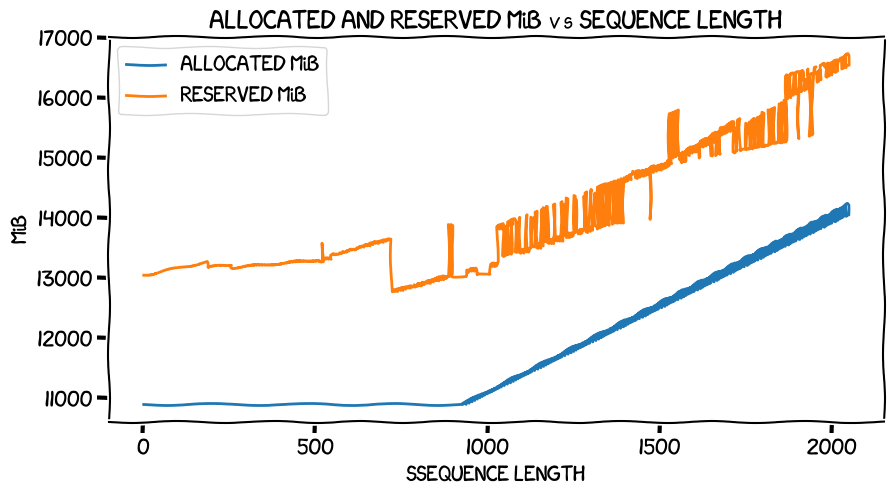

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df['Sequence length'], df['Allocated MiB'], label='ALLOCATED MiB')
plt.plot(df['Sequence length'], df['Reserved MiB'], label='RESERVED MiB')

plt.xlabel('SSEQUENCE LENGTH')
plt.ylabel('MiB')
plt.title('ALLOCATED AND RESERVED MiB vs SEQUENCE LENGTH')
plt.legend()
plt.grid(True)

plt.savefig("/tmp/sequence-length-vs-memory-with-env-var.png")
plt.show()

In [5]:
df = pd.read_csv('results-without-env-var.csv', header=None, names=['Sequence length', 'Allocated MiB', 'Reserved MiB'])
print(df.head())

   Sequence length  Allocated MiB  Reserved MiB
0                1          10900         14024
1               11          10900         14034
2               21          10900         14044
3               31          10900         14056
4               41          10900         14072


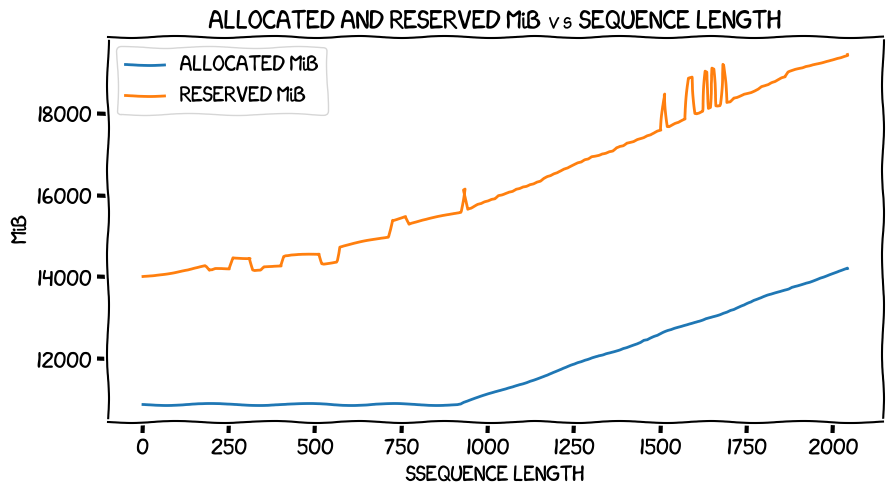

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(df['Sequence length'], df['Allocated MiB'], label='ALLOCATED MiB')
plt.plot(df['Sequence length'], df['Reserved MiB'], label='RESERVED MiB')

plt.xlabel('SSEQUENCE LENGTH')
plt.ylabel('MiB')
plt.title('ALLOCATED AND RESERVED MiB vs SEQUENCE LENGTH')
plt.legend()
plt.grid(True)

plt.savefig("/tmp/sequence-length-vs-memory-without-env-var.png")
plt.show()